## **Example. Stratified sampling in pre-election polling**

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import theano.tensor as tt

plt.style.use('seaborn-darkgrid')
plt.rc('font', size=12)

%config Inline.figure_formats = ['retina']

In [2]:
data = pd.read_csv('data/cbs_survey.txt', sep=' ', skiprows=2, skipinitialspace=True, index_col=False)
data

,region,density,bush,dukakis,other,proportion
0,Northeast,I,0.298,0.617,0.085,0.032
1,Northeast,II,0.500,0.478,0.022,0.032
2,Northeast,III,0.467,0.413,0.120,0.115
3,Northeast,IV,0.464,0.522,0.014,0.048
4,Midwest,I,0.404,0.489,0.106,0.032
5,Midwest,II,0.447,0.447,0.106,0.065
6,Midwest,III,0.509,0.388,0.103,0.080
7,Midwest,IV,0.552,0.338,0.110,0.100
8,South,I,0.571,0.286,0.143,0.015
9,South,II,0.469,0.406,0.125,0.066


In [3]:
data_obs = data[['bush', 'dukakis', 'other']].values
proportion = data['proportion'].values * 1447

In [4]:
print(data_obs.shape)
print(proportion.shape)
proportion
# np.ones_like(data_obs

(16, 3)
(16,)


array([ 46.304,  46.304, 166.405,  69.456,  46.304,  94.055, 115.76 ,
       144.7  ,  21.705,  95.502,  98.396, 182.322,  33.281,  76.691,
       124.442,  82.479])

In [5]:
sparsity = 1 #not zero
beta = np.ones(data_obs.shape)/3 #input for dirichlet
# print(beta)
n = 16
testval = np.asarray([stats.multinomial.rvs(p=a, n=n) for a in beta])
testval
valores = data_obs[:, :] * proportion.reshape(16, -1)
valores = np.round(valores)
np.sum(np.sum(valores, axis=1))

1447.0

In [6]:
with pm.Model() as model_non_hiera:
    
#     thetas = [pm.Dirichlet(f'thetas{i}', a=np.ones_like([3, 3, 3]), shape=(1, 3)) for i in range(0, 16)]
#     post = [pm.Multinomial(f'post{i}', n=proportion[i], p=thetas[i], observed=data_obs[i, :]) for i in range(16)]

    thetas = pm.Dirichlet('thetas', a=np.ones_like(data_obs), shape=(16, 3))
    post = pm.Multinomial('post', n=np.sum(valores, axis=1), p=thetas, observed=valores)

/home/rosgori/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [7]:
model_non_hiera.check_test_point()

thetas_stickbreaking__    -41.64
post                     -322.85
Name: Log-probability of test_point, dtype: float64

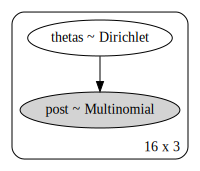

In [8]:
pm.model_to_graphviz(model_non_hiera)

In [9]:
with model_non_hiera:
    trace_1 = pm.sample(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetas]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:15<00:00, 1039.68draws/s]


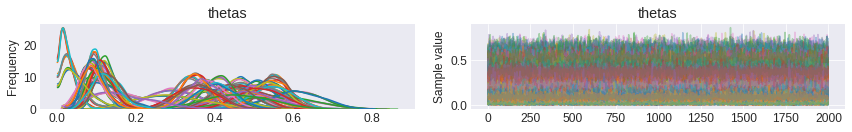

In [25]:
pm.traceplot(trace_1);

In [11]:
pm.summary(trace_1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
thetas__0_0,0.299542,0.063400,0.000454,0.180092,0.424889,20003.999850,0.999805
thetas__0_1,0.600838,0.068622,0.000541,0.472058,0.738207,19574.808076,0.999795
thetas__0_2,0.099621,0.042064,0.000344,0.026869,0.181569,18288.502947,0.999783
thetas__1_0,0.489548,0.070977,0.000502,0.350217,0.628429,20746.731257,0.999894
thetas__1_1,0.470114,0.070791,0.000489,0.331658,0.607298,20348.017508,0.999843
thetas__1_2,0.040339,0.027768,0.000209,0.001238,0.094066,14794.810535,0.999792
thetas__2_0,0.464976,0.039588,0.000290,0.392415,0.547059,19608.426756,0.999818
thetas__2_1,0.411480,0.038778,0.000281,0.334516,0.485972,18898.459216,0.999768
thetas__2_2,0.123543,0.025375,0.000183,0.074736,0.172042,18301.159357,0.999839
thetas__3_0,0.458266,0.057701,0.000477,0.345977,0.569688,18225.217843,0.999807


In [12]:
with model_non_hiera:
    ppc_non_hiera = pm.sample_posterior_predictive(trace_1, samples=1000, vars=[thetas, post])

100%|██████████| 1000/1000 [00:01<00:00, 960.74it/s]


In [13]:
ppc_non_hiera['thetas'].shape

(1000, 16, 3)

In [14]:
proportion / np.sum(proportion)

array([0.03206413, 0.03206413, 0.11523046, 0.04809619, 0.03206413,
       0.06513026, 0.08016032, 0.1002004 , 0.01503006, 0.06613226,
       0.06813627, 0.12625251, 0.02304609, 0.05310621, 0.08617234,
       0.05711423])

In [15]:
ppc_non_hiera['post'][0, :, 0]

array([ 17.,  23.,  95.,  27.,  15.,  32.,  56.,  73.,  14.,  45.,  51.,
       112.,  15.,  40.,  64.,  52.])

In [16]:
diff = []

for i in range(16):
    result = ppc_non_hiera['thetas'][:, i, 0] - ppc_non_hiera['thetas'][:, i, 1]
    diff.append(list(result))

In [17]:
diff = np.asarray(diff)
diff

array([[-0.26980898, -0.23141623, -0.24449352, ..., -0.12200188,
        -0.50776797, -0.13584611],
       [-0.01775869, -0.04502462, -0.06671272, ...,  0.16036084,
        -0.12880336,  0.16525048],
       [ 0.10781733,  0.17692549,  0.09324814, ...,  0.16421782,
        -0.04678985,  0.18552823],
       ...,
       [ 0.23109658,  0.2585616 , -0.12535769, ...,  0.26713797,
         0.07612264,  0.262102  ],
       [ 0.21515438,  0.32335733,  0.23051151, ...,  0.03288159,
         0.27377512,  0.04011775],
       [ 0.18442349,  0.25988253,  0.00884456, ...,  0.34105401,
         0.14567319,  0.23388622]])

In [18]:
diff.shape

(16, 1000)

In [19]:
proportion.shape

(16,)

In [20]:
res = np.sum(diff.T * proportion / np.sum(proportion), axis=1)

In [26]:
# res

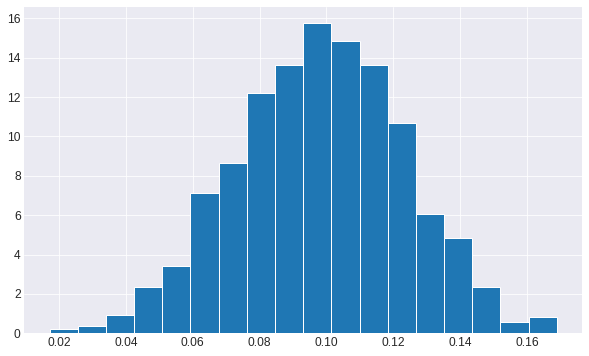

In [288]:
plt.figure(figsize=(10, 6))
_, _, _ = plt.hist(res, bins=18, edgecolor='w', density=True)

### **Modelo jerárquico**

In [282]:
valores
data

,region,density,bush,dukakis,other,proportion
0,Northeast,I,0.298,0.617,0.085,0.032
1,Northeast,II,0.500,0.478,0.022,0.032
2,Northeast,III,0.467,0.413,0.120,0.115
3,Northeast,IV,0.464,0.522,0.014,0.048
4,Midwest,I,0.404,0.489,0.106,0.032
5,Midwest,II,0.447,0.447,0.106,0.065
6,Midwest,III,0.509,0.388,0.103,0.080
7,Midwest,IV,0.552,0.338,0.110,0.100
8,South,I,0.571,0.286,0.143,0.015
9,South,II,0.469,0.406,0.125,0.066


In [280]:
menos_uno = np.round((1 - data['other'].values) * data.proportion.values * 1447)
menos_uno

array([ 42.,  45., 146.,  68.,  41.,  84., 104., 129.,  19.,  84.,  90.,
       165.,  32.,  68., 113.,  76.])

In [204]:
nuevos_valores = np.round(np.stack([valores[:, 0] / (valores[:, 0] + valores[:, 1]) * data.proportion.values * 1447, menos_uno], axis=1))
nuevos_valores

array([[ 15.,  42.],
       [ 24.,  45.],
       [ 88., 146.],
       [ 33.,  68.],
       [ 21.,  41.],
       [ 47.,  84.],
       [ 66., 104.],
       [ 90., 129.],
       [ 14.,  19.],
       [ 51.,  84.],
       [ 55.,  90.],
       [112., 165.],
       [ 17.,  32.],
       [ 46.,  68.],
       [ 74., 113.],
       [ 50.,  76.]])

In [476]:
with pm.Model() as model_hier:
    
#     rho = pm.Uniform('rho', lower=-1, upper=2)
    rho = pm.Normal('rho', mu=0, sd=0.6)
#     mu = pm.Uniform('mu', lower=0, upper=20, shape=(2,))
    mu = pm.HalfCauchy('mu', beta=1, shape=(2,))
#     tau = pm.Uniform('tau', lower=0, upper=5, shape=(2,))
    tau = pm.Beta('tau', alpha=4, beta=4, shape=(2,))
    
    covariance = tt.stack([[tau[0]**2, rho * tau[0] * tau[1]], [rho * tau[0] * tau[1], tau[1]**2]])
       
    beta = pm.MvNormal('beta', mu=mu, cov=covariance, shape=2)
    
    alpha1 = pm.invlogit(beta[0])
    alpha2 = pm.invlogit(beta[1])
    
#     diffe = pm.Deterministic('diffe', 2 * alpha1 * alpha2 - alpha2)
    
    alphas = pm.Dirichlet('alphas', a=tt.stack([alpha1, alpha2]), shape=(16, 2))
    post = pm.Multinomial('post', n=np.sum(nuevos_valores, axis=1), p=alphas, observed=nuevos_valores)

/home/rosgori/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [477]:
model_hier.check_test_point()

rho                        -0.41
mu_log__                   -2.29
tau_logodds__              -1.21
beta                       -0.45
alphas_stickbreaking__    -25.34
post                     -105.64
Name: Log-probability of test_point, dtype: float64

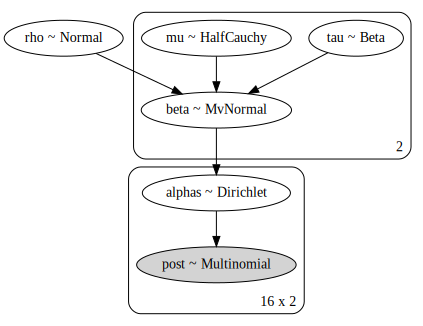

In [478]:
pm.model_to_graphviz(model_hier)

In [ ]:
with model_hier:
    trace_2 = pm.sample(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/rosgori/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/rosgori/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alphas, beta, tau, mu, rho]
Sampling 4 chains:  16%|█▌        | 2568/16000 [00:46<06:16, 35.72draws/s]

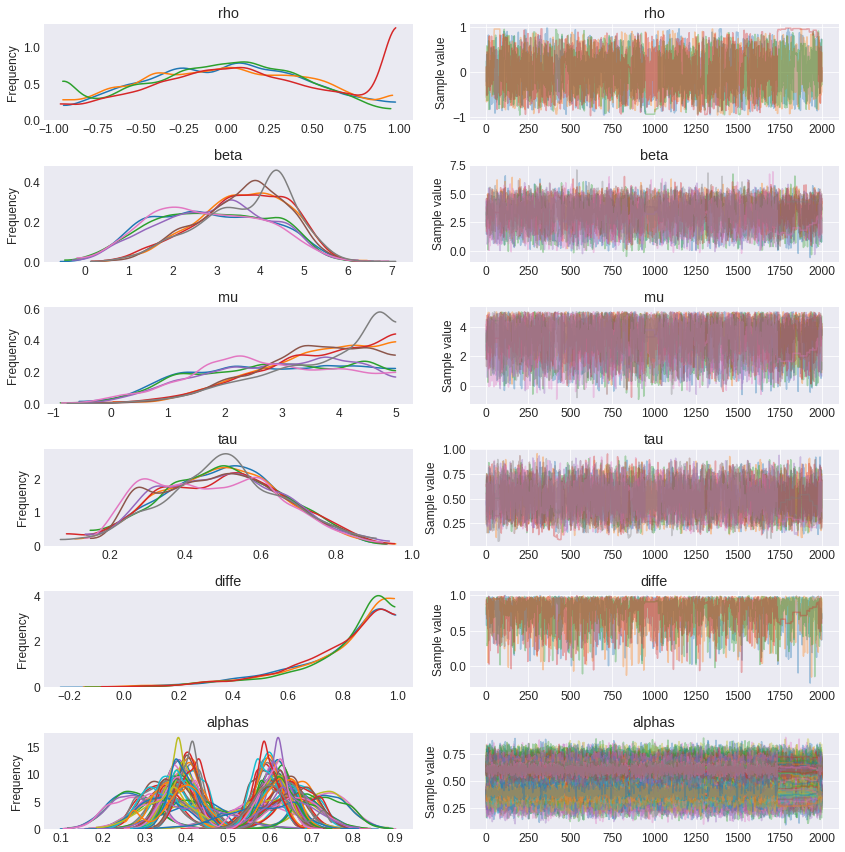

In [448]:
pm.traceplot(trace_2);

In [449]:
pm.summary(trace_2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
rho,0.026262,0.486198,0.019586,-0.776672,0.982571,219.477597,1.008274
beta__0,2.882723,1.293977,0.029046,0.587671,5.187584,1975.827576,1.001178
beta__1,3.605552,1.044456,0.022883,1.533640,5.422674,1807.881542,1.000942
mu__0,2.823693,1.283669,0.027996,0.682076,4.996197,2139.228438,1.001272
mu__1,3.513395,1.054367,0.026776,1.573847,4.999955,947.342508,1.003287
tau__0,0.494115,0.162296,0.005002,0.200195,0.801636,580.154804,1.002979
tau__1,0.495382,0.164286,0.004009,0.196106,0.816579,1725.987161,0.999951
diffe,0.779711,0.194553,0.004066,0.356060,0.986207,2466.786818,1.001018
alphas__0_0,0.272502,0.057480,0.001237,0.162145,0.382102,1891.155509,1.001204
alphas__0_1,0.727498,0.057480,0.001237,0.617898,0.837855,1891.155509,1.001204


In [450]:
with model_hier:
    ppc_hier = pm.sample_posterior_predictive(trace_2, samples=1000, vars=[alphas, diffe])

100%|██████████| 1000/1000 [00:00<00:00, 27298.67it/s]


In [451]:
ppc_hier['alphas'].shape

(1000, 16, 2)

In [458]:
th1 = []
th2 = []

for i in range(16):
    result1 = ppc_hier['alphas'][:, i, 0] * ppc_hier['alphas'][:, i, 1]
    result2 = ppc_hier['alphas'][:, i, 1] - ppc_hier['alphas'][:, i, 0] * ppc_hier['alphas'][:, i, 1]
    th1.append(result1 - result2)

In [459]:
th1 = np.asarray(th1)

In [463]:
res2 = np.sum(th1.T * proportion / np.sum(proportion), axis=1)
res2[:15]

array([-0.14891755, -0.13593357, -0.15645181, -0.13211676, -0.13384177,
       -0.13437302, -0.13437302, -0.16392439, -0.15918594, -0.14332431,
       -0.15431079, -0.17379302, -0.16523523, -0.15819441, -0.14353797])

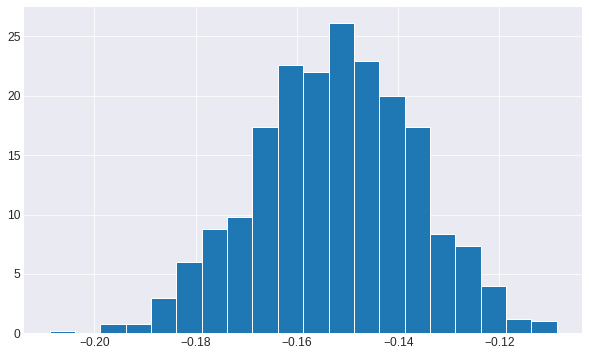

In [461]:
plt.figure(figsize=(10, 6))
_, _, _ = plt.hist(res2, bins=20, edgecolor='w', density=True)

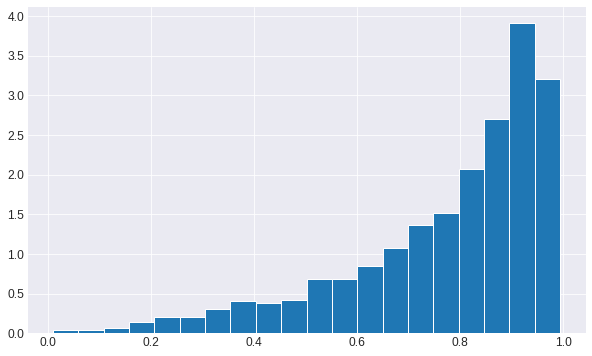

In [456]:
plt.figure(figsize=(10, 6))
_, _, _ = plt.hist(ppc_hier['diffe'], bins=20, edgecolor='w', density=True)